# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [134]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [100]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [135]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [102]:
df_train.shape

(15223, 52)

In [136]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [137]:
df_test.shape

(14910, 52)

In [138]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [139]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [140]:
df = df_test.append(df_train).reset_index(drop=True)

In [141]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [143]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неоконченное высшее', 'Неполное среднее', 'Среднее', 'Среднее специальное', 'Высшее', 'Два и более высших образования', 'Ученая степень'}


MARITAL_STATUS
{'Состою в браке', 'Не состоял в браке', 'Гражданский брак', 'Разведен(а)', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Салоны красоты и здоровья', 'Маркетинг', 'Сельское хозяйство', 'Транспорт', 'ЧОП/Детективная д-ть', 'Энергетика', 'Логистика', 'Банк/Финансы', 'Туризм', 'Управляющая компания', 'Образование', 'Коммунальное хоз-во/Дорожные службы', 'Торговля', 'Информационные услуги', 'Другие сферы', 'Сборочные производства', 'Здравоохранение', 'Информационные технологии', 'Нефтегазовая промышленность', 'Металлургия/Промышленность/Машиностроение', 'Недвижимость', 'Государственная служба', 'Страхование', 'Развлечения/Искусство', 'Строительство', 'Юридические услуги/нотариальные услуги', 'Химия/Парфюмерия/Фармацевтика', 'Ресторанный бизнес/Общественное питание', 'Наука', 'СМИ/Реклама/PR-агенства', 'Подбор персонала'}


GEN_TITLE


In [84]:
def print_data(df_input):
    for i in df_input.columns: # перебираем все столбцы
        if str(df_input[i].dtype) == 'object': # если тип столбца - object
            print('='*10)
            print(i) # выводим название столбца
            print(set(df_input[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
            print('\n') # выводим пустую строку

Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [ ]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [164]:
#1. после изучения данных было сделано заключение, большенство пропусков данных наблюдаеться при условие ['GEN_INDUSTRY'].isnull()- удалить данные записи.
#2. В рамках ДЗ удалить записи в которых есть пропуски
dfTEmp= df.copy()
dfTEmp = df[df['GEN_INDUSTRY'].isnull()] 
dfTEmp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2713 entries, 1 to 30131
Data columns (total 53 columns):
AGREEMENT_RK                  2713 non-null int64
TARGET                        2713 non-null int64
AGE                           2713 non-null int64
SOCSTATUS_WORK_FL             2713 non-null int64
SOCSTATUS_PENS_FL             2713 non-null int64
GENDER                        2713 non-null int64
CHILD_TOTAL                   2713 non-null int64
DEPENDANTS                    2713 non-null int64
EDUCATION                     2713 non-null object
MARITAL_STATUS                2713 non-null object
GEN_INDUSTRY                  0 non-null object
GEN_TITLE                     0 non-null object
ORG_TP_STATE                  0 non-null object
ORG_TP_FCAPITAL               6 non-null object
JOB_DIR                       0 non-null object
FAMILY_INCOME                 2713 non-null object
PERSONAL_INCOME               2713 non-null object
REG_ADDRESS_PROVINCE          2713 non-null obje

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
#да есть
#EDUCATION		оставить
#MARITAL_STATUS		оставить
#GEN_INDUSTRY		оставить
#GEN_TITLE		оставить
#ORG_TP_STATE		оставить
#ORG_TP_FCAPITAL		оставить
#JOB_DIR		оставить
#FAMILY_INCOME		оставить
#REG_ADDRESS_PROVINCE		в рамках ДЗ удалить
#FACT_ADDRESS_PROVINCE		в рамках ДЗ удалить
#POSTAL_ADDRESS_PROVINCE		в рамках ДЗ удалить
#TP_PROVINCE		в рамках ДЗ удалить
#REGION_NM		оставить
#sample		оставить

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* !Удаляло идентификатор `AGREEMENT_RK`
* !Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* !Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [253]:
def preproc_data(df_input):
    df_output = df_input.copy()
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
#Удаляем категории которые помтили в рамках ДЗ для удаления 
    df_output = df_output.drop(['REG_ADDRESS_PROVINCE'], axis=1)
    df_output = df_output.drop(['FACT_ADDRESS_PROVINCE'], axis=1)
    df_output = df_output.drop(['POSTAL_ADDRESS_PROVINCE'], axis=1)
    df_output = df_output.drop(['TP_PROVINCE'], axis=1)
#Удаляем пропуски GEN_INDUSTRY, REGION_NM, ORG_TP_FCAPITAL
    df_output = df_output[~df_output['GEN_INDUSTRY'].isnull()] 
    df_output = df_output[~df_output['REGION_NM'].isnull()] 
    df_output = df_output[~df_output['ORG_TP_FCAPITAL'].isnull()] 
#Конвертим в число    
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT']          = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT']      = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
#Заполняем пропуски 
    #PREVIOUS_CARD_NUM_UTILIZED	количество уже утилизированных карт ( если пусто - 0) 
    df_output['PREVIOUS_CARD_NUM_UTILIZED'][df_output['PREVIOUS_CARD_NUM_UTILIZED'].isnull()]=0
    #время работы на текущем месте (в месяцах) пустые значения сделаем медианой.
    df_output['WORK_TIME'][df_output['WORK_TIME'].isnull()]=df_output['WORK_TIME'].median()
## Кодировка категориальных признаков
    df_output = pd.get_dummies(df_output, 
                               columns=['EDUCATION', 'MARITAL_STATUS','GEN_INDUSTRY','GEN_TITLE',
                                       'ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR','FAMILY_INCOME','REGION_NM'])

    return df_output

In [459]:
df2=preproc_data(df)
#df2.info()
#preproc_data(df2)
#df2['PREVIOUS_CARD_NUM_UTILIZED']=0
#df.info()
df2.info(verbose='true')
#ORG_TP_FCAPITAL,TP_PROVINCE,REGION_NM
#df2[df2['WORK_TIME'].isnull()]
#display(df2[df2['WORK_TIME'].isnull()].to_string())
#with pd.option_context('display.max_rows', None, 'display.max_columns', 52):
#    print(df2[df2['ORG_TP_FCAPITAL'].isnull()])
#display(df2[df2['ORG_TP_FCAPITAL'].isnull()])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27417 entries, 0 to 30132
Data columns (total 127 columns):
TARGET                                                    int64
AGE                                                       int64
SOCSTATUS_WORK_FL                                         int64
SOCSTATUS_PENS_FL                                         int64
GENDER                                                    int64
CHILD_TOTAL                                               int64
DEPENDANTS                                                int64
PERSONAL_INCOME                                           float64
REG_FACT_FL                                               int64
FACT_POST_FL                                              int64
REG_POST_FL                                               int64
REG_FACT_POST_FL                                          int64
REG_FACT_POST_TP_FL                                       int64
FL_PRESENCE_FL                                          

In [255]:
print_data(df2)

sample
{'train', 'test'}




In [460]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [363]:
df_train_preproc.info()
df_test_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13854 entries, 14910 to 30132
Columns: 126 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(31), uint8(88)
memory usage: 5.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13563 entries, 0 to 14909
Columns: 126 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(31), uint8(88)
memory usage: 5.2 MB


In [ ]:
# Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [264]:
Y_train_preproc = df_train_preproc['TARGET']
X_train_preproc = df_train_preproc.drop(['TARGET'], axis=1)

Y_test_preproc = df_test_preproc['TARGET']
X_test_preproc = df_test_preproc.drop(['TARGET'], axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [272]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
## Your Code Here
X_train, X_test, y_train, y_test = train_test_split(X_train_preproc, Y_train_preproc, test_size=0.3, random_state=42)

In [276]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
## Your Code Here


In [499]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
predict_dtc = dtc.predict(X_test)
predict_proba_dtc = dtc.predict_proba(X_test)

In [450]:
predict_proba_dtc[:,1]

array([ 0.,  0.,  1., ...,  0.,  0.,  0.])

In [448]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict_rfc = rfc.predict(X_test)
predict_proba_rfc = rfc.predict_proba(X_test)

In [449]:
predict_proba_rfc[:,1]

array([ 0.1,  0.1,  0. , ...,  0. ,  0.2,  0.2])

In [470]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predict_lr = lr.predict(X_test)
predict_proba_lr = lr.predict_proba(X_test)

In [452]:
predict_proba_lr[:,1]

array([ 0.14469375,  0.1834575 ,  0.2338563 , ...,  0.07031528,
        0.10928706,  0.08344676])

In [453]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

## Your Code Here
print('accuracy_dtc', accuracy_score(y_test, predict_dtc))
print('precision_dtc', precision_score(y_test, predict_dtc))
print('recall_dtc', recall_score(y_test, predict_dtc))
print('f1_dtc', f1_score(y_test, predict_dtc))

accuracy_dtc 0.777002646139
precision_dtc 0.155440414508
recall_dtc 0.170454545455
f1_dtc 0.162601626016


In [454]:
## Your Code Here
print('accuracy_rfc', accuracy_score(y_test, predict_rfc))
print('precision_rfc', precision_score(y_test, predict_rfc))
print('recall_rfc', recall_score(y_test, predict_rfc))
print('f1_rfc', f1_score(y_test, predict_rfc))

accuracy_rfc 0.868895838345
precision_rfc 0.130434782609
recall_rfc 0.00568181818182
f1_rfc 0.010889292196


In [471]:
## Your Code Here
print('accuracy_lr', accuracy_score(y_test, predict_lr))
print('precision_lr', precision_score(y_test, predict_lr))
print('recall_lr', recall_score(y_test, predict_lr))
print('f1_lr', f1_score(y_test, predict_lr))

accuracy_lr 0.873225884051
precision_lr 1.0
recall_lr 0.00189393939394
f1_lr 0.00378071833648


In [456]:
#остановился тут!
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)
## Your Code Here
from sklearn.metrics import precision_recall_curve
precision_dtc, recall_dtc, thresholds_dtc = precision_recall_curve(y_test,predict_proba_dtc[:,1])
precision_rfc, recall_rfc, thresholds_rfc = precision_recall_curve(y_test,predict_proba_rfc[:,1])
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test,predict_proba_lr[:,1])

(-0.01, 1.01)

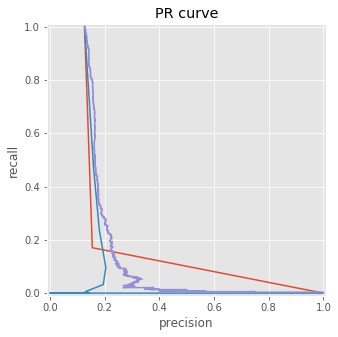

In [457]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot(precision_dtc, recall_dtc)
plt.plot(precision_rfc, recall_rfc)
plt.plot(precision_lr, recall_lr)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

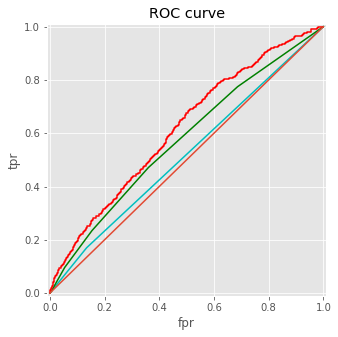

In [483]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test,predict_proba_dtc[:,1])
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test,predict_proba_rfc[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test,predict_proba_lr[:,1])


plt.figure(figsize=(5, 5))
plt.plot(fpr_dtc, tpr_dtc,'c')
plt.plot(fpr_rfc, tpr_rfc,'g')
plt.plot(fpr_lr, tpr_lr,'r')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [462]:
roc_auc_score(y_test,predict_temp_dtc[:,1])

0.51120706931536364

In [463]:
roc_auc_score(y_test,predict_temp_rfc[:,1])

0.58881265813271877

In [464]:
roc_auc_score(y_test,predict_temp_lr[:,1])

0.61379032123383181

In [493]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
my_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
## Your Code Here


In [510]:
my_cv

StratifiedKFold(n_splits=10, random_state=123, shuffle=True)

In [513]:
#cv = my_cv - выдает ошибку, причину не могу разобратся.TypeError: 'StratifiedKFold' object is not iterable

d_dtc = cross_val_score(
    dtc,
    X_train_preproc,
    Y_train_preproc,
    scoring = 'roc_auc',
    cv = 10
)
d_dtc.mean()

0.53267531345545283

In [466]:
d_rfc = cross_val_score(
    rfc,
    X_train_preproc,
    Y_train_preproc,
    scoring = 'roc_auc',
    cv=10
)
d_rfc.mean()

0.5867615713891623

In [467]:
d_lr = cross_val_score(
    lr,
    X_train_preproc,
    Y_train_preproc,
    scoring = 'roc_auc',
    cv=10
)
d_lr.mean()

0.61823737833318337

In [476]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

#Y_test_preproc = df_test_preproc['TARGET']
#X_test_preproc = df_test_preproc.drop(['TARGET'], axis=1)
## Your Code Here
predict_TEST = lr.predict(X_test_preproc)
#X_test_preproc.head()


0    0
2    0
3    0
4    0
6    0
Name: TARGET, dtype: int64

In [480]:
print('accuracy_lr', accuracy_score(Y_test_preproc, predict_TEST))
print('precision_lr', precision_score(Y_test_preproc, predict_TEST))
print('recall_lr', recall_score(Y_test_preproc, predict_TEST))
print('f1_lr', f1_score(Y_test_preproc, predict_TEST))

accuracy_lr 0.873110668731
precision_lr 0.0
recall_lr 0.0
f1_lr 0.0


In [478]:
predict_temp_TEST = lr.predict_proba(X_test_preproc)
predict_temp_TEST[:,1]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


array([ 0.16645037,  0.1762482 ,  0.23717997, ...,  0.13046394,
        0.2021977 ,  0.19540204])

In [ ]:
# Померить roc_auc на тесте


(-0.01, 1.01)

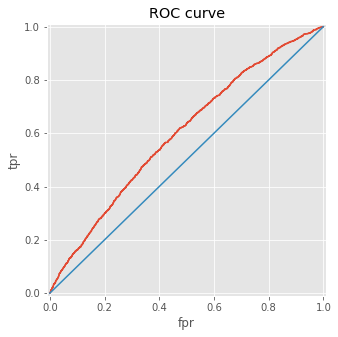

In [481]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_test_preproc,predict_temp_TEST[:,1])

plt.figure(figsize=(5, 5))
plt.plot(fpr_lr, tpr_lr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))